# Proyek Analisis Data: Bike Sharing
- **Nama:** Fildzah Khalishah Ghassani
- **Email:** m206d4kx2244@bangkit.academy
- **ID Dicoding:** fildzahkhls

## Menentukan Pertanyaan Bisnis

- Bagaimana pola jumlah peminjaman sepeda pada setiap jam dalam satu hari?
- Apakah terdapat tren jangka panjang dalam jumlah total peminjaman sepeda dari waktu ke waktu?
- Bagaimana korelasi antara musim dan jumlah penyewaan sepeda harian, pada musim apakah peminjam terbanyak?
- Bagaimana perbandingan jumlah peminjaman sepeda antara registered (pelanggan terdaftar) dan casual (pelanggan tidak terdaftar) pada hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

Membuat data frame yang diberi nama hour dan day

In [2]:
hour = pd.read_csv("hour.csv")
print(hour.shape)
hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day = pd.read_csv("day.csv")
print(day.shape)
day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Berikut ini keterangan dari masing-masing kolom pada data frame:

1. **instant**: Hanya pemberian nomor biasa untuk pembeda tiap baris.

2. **dteday**: Tanggal peminjaman sepeda.

3. **season**: Musim dalam setahun, dengan keterangan 1 untuk musim dingin, 2 untuk musim semi, 3 untuk musim panas, dan 4 untuk musim gugur (berdasarkan urutan musim dalam setahun).

4. **yr**: Tahun pengambilan data, dengan keterangan 0 untuk tahun 2011 dan 1 untuk tahun 2012.

5. **mnth**: Bulan dalam setahun, dengan keterangan 1 hingga 12, mewakili Januari hingga Desember.

6. **hr**: Jam dalam sehari, dengan keterangan 0 hingga 23, mewakili jam dalam format 24 jam.

7. **holiday**: Indikator apakah hari tersebut adalah hari libur atau tidak. Nilai 1 menunjukkan hari libur, sedangkan nilai 0 menunjukkan bukan hari libur.

8. **weekday**: Hari dalam seminggu, dengan keterangan 0 hingga 6, mewakili Senin hingga Minggu.

9. **workingday**: Indikator apakah hari tersebut adalah hari kerja atau tidak. Nilai 1 menunjukkan hari kerja, sedangkan nilai 0 menunjukkan bukan hari kerja.

10. **weathersit**: Kondisi cuaca. Nilai-nilai yang mungkin adalah 1 hingga 4, yang masing-masing mewakili:
   - 1: Bright
   - 2: Misty
   - 3: Lightsnow
   - 4: Heavysnow

11. **temp**: Suhu dalam derajat Celsius.

12. **atemp**: Suhu dalam derajat Celsius, tetapi dirasakan oleh manusia.

13. **hum**: Kelembaban relatif.

14. **windspeed**: Kecepatan angin.

15. **casual**: Jumlah peminjam sepeda yang tidak terdaftar.

16. **registered**: Jumlah peminjam sepeda yang terdaftar.

17. **cnt**: Jumlah total peminjaman sepeda (casual + registered).

### Assessing Data

Mengecek tipe data dari data frame hour dan day

In [4]:
print('\n', hour.info())
print('\n', day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

 None
<class 'pandas.core.frame.DataFrame'>
Rang

Terdapat beberapa kolom yang **tidak sesuai dengan tipe datanya** seperti **dteday** dari objek harusnya datetime

In [5]:
print('\nInfo data null hour data frame:\n', hour.isna().sum())
print('\nInfo data null day data frame:\n', day.isna().sum())


Info data null hour data frame:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info data null day data frame:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


tidak terdapat data null atau kosong pada kedua data frame

In [6]:
print('\nInfo data duplikat hour data frame:\n', hour.duplicated().sum())
print('\nInfo data duplikat day data frame:\n', day.duplicated().sum())


Info data duplikat hour data frame:
 0

Info data duplikat day data frame:
 0


tidak terdapat data duplikat pada kedua data frame

In [7]:
print('\nData statistik dari data frame hour:\n', hour.describe(include='all'))
print('\nnData statistik dari data frame day:\n', day.describe(include='all'))


Data statistik dari data frame hour:
            instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday

### Cleaning Data

#### 1. Drop

Menghapus kolom yang tidak penting seperti instant (karna dia hanya nomor biasa saja tidak akan terpakai pada analisis dan visualisasi data) dan menghapus workingday karna sudah terwakili di weekday (karna weekday meliput 0-6 atau Minggu-Sabtu)

In [8]:
hour.drop(columns=['instant', 'workingday'], inplace=True)
day.drop(columns=['instant', 'workingday'], inplace=True)

#### 2. Convert Datatype

- Mengubah tipe data dteday yang tadinya dari object ke datetime
- Mengubah tipe data int menjadi category pada kolom season jadi ('Spring','Summer','Fall','Winter'), mnth jadi ('Jan','Feb','Mar','Apr','May','Jun','Jul,'Aug','Sept','Oct','Nov','Dec'), weathersit jadi ('Bright','Misty','Lightsnow','Heavysnow'), dan weekday jadi ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday')

In [9]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
day['dteday'] = pd.to_datetime(day['dteday'])

In [10]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    hour[column] =  hour[column].astype("category")
    day[column] =  day[column].astype("category")

#### 3. Rename the contents of the column whose data type has been changed

In [11]:
day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

day.weathersit.replace((1,2,3,4), ('Bright','Misty','Lightsnow','Heavysnow'), inplace=True)
hour.weathersit.replace((1,2,3,4), ('Bright','Misty','Lightsnow','Heavysnow'), inplace=True)

day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day.yr.replace((0,1), ('2011','2012'), inplace=True)
hour.yr.replace((0,1), ('2011','2012'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore Hour Data Frame

In [12]:
hour.describe(include='all')

C:\Users\fildz\AppData\Local\Temp\ipykernel_16548\3933873536.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour.describe(include='all')


,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,Bright,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Dari ringkasan statistik di atas, kita bisa lihat bahwa, pertama, dataset mencakup rentang waktu dari 2011-01-01 hingga 2012-12-31, yang terdiri dari 731 hari sehingga dapat kita tarik kesimpulan bahwa pengumpulan datanya setiap hari selama dua tahun. Lalu, terdapat 4 musim dengan Fall memiliki frekuensi terbanyak, yaitu 4496. JIka dilihat pada bagian bulan, May menjadi bulan dengan frekuensi tertinggi, mencapai 1488. Rentang jam dalam sehari dari 0 hingga 23. Dapat dilihat juga bahwa Sabtu merupakan hari dengan frekuensi tertinggi dalam dataset, yakni 2512. Variabel cuaca juga ada, dengan Bright menjadi yang paling banyak dengan 11413 frekuensi.

In [13]:
hour.groupby(["mnth", "yr"])["cnt"].sum().reset_index().sort_values(by=["yr","mnth"])

,mnth,yr,cnt
0,Jan,2011,38189
2,Feb,2011,48215
4,Mar,2011,64045
6,Apr,2011,94870
8,May,2011,135821
10,Jun,2011,143512
12,Jul,2011,141341
14,Aug,2011,136691
16,Sep,2011,127418
18,Oct,2011,123511


data di atas melihat peminjam ditiap bulannya dan jika diurut berdasarkan yang paling banyak adalah

In [14]:
hour.groupby(["mnth", "yr"])["cnt"].sum().reset_index().sort_values(by="cnt", ascending=False)

,mnth,yr,cnt
17,Sep,2012,218573
15,Aug,2012,214503
13,Jul,2012,203607
11,Jun,2012,202830
19,Oct,2012,198841
9,May,2012,195865
7,Apr,2012,174224
5,Mar,2012,164875
21,Nov,2012,152664
10,Jun,2011,143512


In [15]:
hour.groupby(by="hr").cnt.sum().reset_index()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


di atass adalah data peminjam di tiap jamnya dalam satu hari.

### Explore Day Data Frame

In [16]:
day.describe(include='all')

C:\Users\fildz\AppData\Local\Temp\ipykernel_16548\2457449388.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include='all')


,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,Bright,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [17]:
day.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pola jumlah peminjaman sepeda pada setiap jam dalam satu hari?

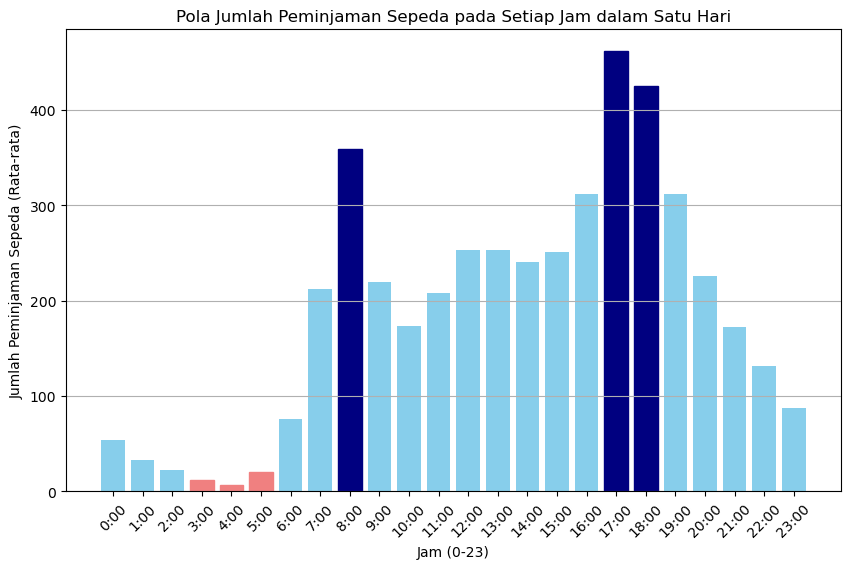

In [18]:
hourly_rentals = hour.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 6))

bars = plt.bar(hourly_rentals.index, hourly_rentals.values, color='skyblue')

top_3_hours = hourly_rentals.nlargest(3).index
bottom_3_hours = hourly_rentals.nsmallest(3).index


for hours in top_3_hours:
    bars[hours].set_color('navy')

for hours in bottom_3_hours:
    bars[hours].set_color('lightcoral')

plt.title('Pola Jumlah Peminjaman Sepeda pada Setiap Jam dalam Satu Hari')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda (Rata-rata)')
plt.xticks(range(24), labels=[f'{hours}:00' for hours in range(24)], rotation=45)  # Mengatur label sumbu x
plt.grid(axis='y')

plt.show()

Dari hasil visualisasi diatas, dapat diketahui bahwa peminjaman sepeda paling tinggi pada **pagi hari yaitu jam 8 dan sore hari dijam 5 dan jam 6** dan paling rendah itu **disubuh hari jam 3, 4 dan 5**

### Pertanyaan 2: Apakah terdapat tren jangka panjang dalam jumlah total peminjaman sepeda dari waktu ke waktu?

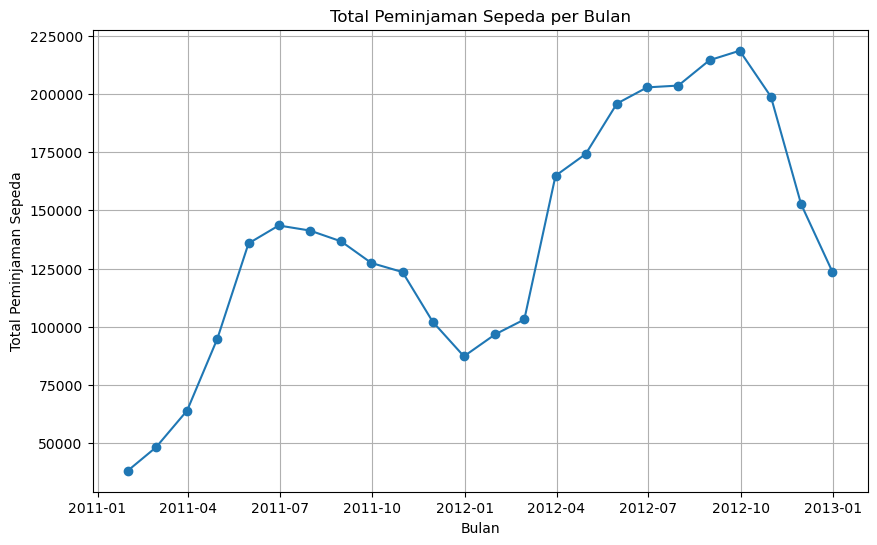

In [19]:
monthly_total_rentals = hour.groupby(pd.Grouper(key='dteday', freq='M'))['cnt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_rentals.index, monthly_total_rentals.values, marker='o', linestyle='-')
plt.title('Total Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman Sepeda')
plt.grid(True)
plt.show()

Dari hasil visualisasi di atas, terlihat bahwa peminjaman sepeda mencapai **puncaknya antara bulan 7 dan 10 2012**. Sedangkan **peningkatan tertinggi terjadi antara bulan 3 dan 4 2012**, dan **penurunan tertinggi terjadi antara bulan 10 dan bulan 11 2012**.

### Pertanyaan 3: Bagaimana korelasi antara musim dan jumlah penyewaan sepeda harian, pada musim apakah peminjam terbanyak?

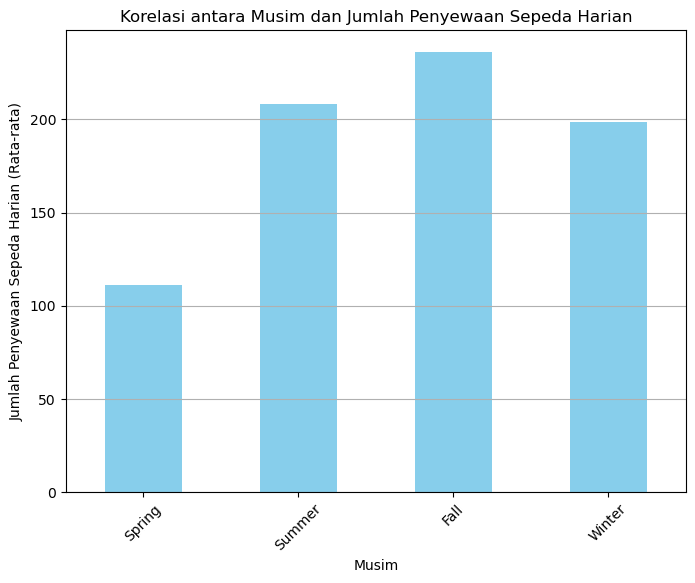

In [20]:
seasonal_rentals = hour.groupby('season')['cnt'].mean()
plt.figure(figsize=(8, 6))
seasonal_rentals.plot(kind='bar', color='skyblue')
plt.title('Korelasi antara Musim dan Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda Harian (Rata-rata)')
plt.xticks(range(4), rotation=45)
plt.grid(axis='y')
plt.show()


Dari hasil visualisasi diatas, dapat diketahui bahwa peminjaman sepeda paling tinggi terjadi pada musim gugur, diikuti dengan musim panas, musim dingin, dan musim semi.

### Pertanyaan 4:Bagaimana perbandingan jumlah peminjaman sepeda antara registered (pelanggan terdaftar) dan casual (pelanggan tidak terdaftar) pada hari libur?

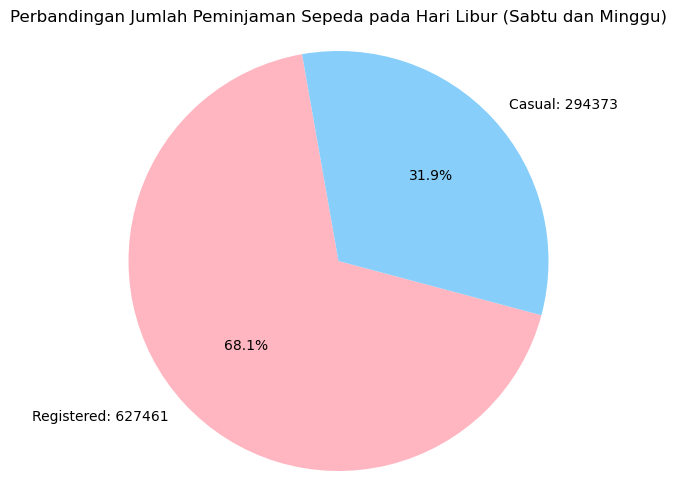

In [21]:
weekend_data = hour.loc[(hour['weekday'] == 'Saturday') | (hour['weekday'] == 'Sunday')]
registered_rentals = weekend_data['registered'].sum()
casual_rentals = weekend_data['casual'].sum()

rentals = [registered_rentals, casual_rentals]
labels = ['Registered', 'Casual']
colors = ['lightpink', 'lightskyblue']

plt.figure(figsize=(8, 6))
plt.pie(rentals, labels=[f'{label}: {count}' for label, count in zip(labels, rentals)], colors=colors, autopct='%1.1f%%', startangle=100)
plt.title('Perbandingan Jumlah Peminjaman Sepeda pada Hari Libur (Sabtu dan Minggu)')
plt.axis('equal') 
plt.show()

Dari hasil visualisasi diatas, dapat diketahui bahwa peminjaman sepeda pada hari libur kebanyakan adalah dari peminjam terdaftar (registered) dengan besaran 68.1% sedangkan casual hanya 31.9%

## Conclusion

- **Kesimpulan dari pertanyaan 1 yaitu**, pola peminjaman sepeda menunjukkan adanya tren yang konsisten sepanjang hari. Puncak peminjaman terjadi pada sore hari sekitar jam 5 dan 6 dan paling rendah itu disubuh hari jam 3, 4 dan 5, yang kemungkinan disebabkan oleh pulangnya orang-orang dari tempat kerja atau sekolah dan menggunakan sepeda untuk rekreasi atau kegiatan lainnya. Sedangkan peminjaman tertinggi selanjutnya terjadi pada pagi hari sekitar jam 8, yang mungkin karena banyaknya orang yang menggunakan sepeda sebagai sarana transportasi untuk berangkat ke tempat kerja atau sekolah. Selain itu, terdapat penurunan jumlah peminjaman pada jam 12 malam hingga sekitar jam 7 pagi, serta pada malam hari. Pola ini berulang setiap hari, menunjukkan bahwa pola peminjaman sepeda pada setiap jam dalam satu hari relatif konsisten dan dapat diandalkan.
- **Kesimpulan pertanyaan 2 yaitu**, terdapat tren jangka panjang dalam jumlah total peminjaman sepeda dari waktu ke waktu. Peminjaman sepeda mencapai puncaknya antara bulan Juli dan Oktober 2012. Peningkatan tertinggi dalam jumlah peminjaman terjadi antara bulan Maret dan April 2012, menunjukkan adanya peningkatan signifikan dalam minat masyarakat untuk menggunakan layanan peminjaman sepeda pada periode tersebut. Namun, terdapat penurunan tertinggi dalam jumlah peminjaman antara bulan Oktober dan November 2012, yang mungkin disebabkan oleh faktor-faktor musiman atau perubahan tren dalam preferensi transportasi. Ini menunjukkan bahwa meskipun terdapat fluktuasi dalam jumlah peminjaman sepeda dari waktu ke waktu, tren jangka panjang menunjukkan adanya periode tertentu di mana minat masyarakat dalam menggunakan layanan peminjaman sepeda lebih tinggi daripada periode lainnya.
- **Kesimpulan pertanyaan 3 yaitu**, Peminjaman sepeda paling tinggi terjadi pada musim gugur, yang kemungkinan disebabkan oleh cuaca yang lebih sejuk dan kondisi yang lebih nyaman untuk bersepeda. Diikuti oleh musim panas, dimana cuaca yang cerah dan hangat membuat orang lebih cenderung untuk beraktivitas di luar ruangan, termasuk bersepeda. Selanjutnya, jumlah penyewaan sepeda pada musim dingin menunjukkan penurunan, mungkin karena cuaca yang lebih dingin dan kurangnya preferensi untuk bersepeda di musim tersebut. Sedangkan pada musim semi, jumlah penyewaan sepeda berada di antara musim gugur dan musim panas. Oleh karena itu, dapat disimpulkan bahwa peminjaman sepeda cenderung tertinggi pada musim gugur, diikuti oleh musim panas, musim semi, dan musim dingin.
- **Kesimpulan pertanyaan 4 yaitu**, Pada hari libur, sebagian besar peminjaman sepeda berasal dari pelanggan terdaftar (registered), dengan proporsi sebesar 68.1%. Ini menunjukkan bahwa pada hari libur, pelanggan terdaftar cenderung lebih aktif dalam menggunakan layanan penyewaan sepeda dibandingkan dengan pelanggan tidak terdaftar (casual). Kemungkinan besar, pelanggan terdaftar memiliki keanggotaan atau komitmen jangka panjang dengan penyedia layanan, sehingga mereka cenderung menggunakan layanan tersebut secara rutin bahkan pada hari libur.Di sisi lain, pelanggan tidak terdaftar (casual) hanya menyumbang sekitar 31.9% dari total peminjaman sepeda pada hari libur. Ini bisa menunjukkan bahwa pelanggan casual mungkin menggunakan layanan penyewaan sepeda secara sporadis atau hanya pada kesempatan tertentu, seperti liburan atau acara khusus.

## Teknik Analisis Lanjutan

### 1. RFM

- Recency: Disini kita akan menggunakan kolom dteday (tanggal) untuk mengukur seberapa baru peminjam berinteraksi dengan bisnis kita dalam hal ini peminjaman sepeda
- Frequency: untuk menghitung jumlah transaksi untuk pelanggan.
- Monetary: Karena tidak ada atribut yang secara langsung sesuai dengan nilai moneter (misalnya, harga sewa sepeda), jadi di sini kita hanya menggunakan kolom cnt yang menunjukkan jumlah total peminjaman sebagai nilai moneter.

In [22]:
latest_date = max(hour['dteday'])

rfm_df = hour.groupby('registered').agg({
    'dteday': lambda x: (latest_date - x.max()).days, 
    'cnt': ['count', 'sum']
}).reset_index()

# Mengganti nama kolom agar sesuai dengan RFM
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### 2. Analisis Cluster

In [23]:
bins = [0.05, 0.2, 0.4, 0.6, 0.8, 0.86]
labels = ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Very Warm']
hour['temp_category'] = pd.cut(hour['temp'], bins=bins, labels=labels)

rentals_by_temp_category = hour.groupby("temp_category")["cnt"].sum().reset_index().sort_values(by="cnt", ascending = False)

print(rentals_by_temp_category)

  temp_category      cnt
3          Warm  1336324
2      Moderate   996132
1          Cold   659269
4     Very Warm   159624
0     Very Cold    68342


Dari hasil analisis di atas kita dapat melihat bahwa peminjam cenderung meminjam sepeda di suhu yang panas/hangat.